# Project 30: Sentiment of Technical Debt Dataset

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10,5]

C:\Users\mirok\AppData\Local\Temp\ipykernel_20388\352070470.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


*1. We want to comprehend each categories in terms of wording they do contain. For this purpose, group
comments pertaining to the same category in the same document, perform appropriate filtering and
lemmatization, then plot WordCloud representation of the associated file. Draw a histogram of the
twenty frequent words in each category.*

In [16]:
# Read data and create lists of comments for each class
df = pd.read_csv("technical_debt_dataset/technical_debt_dataset.csv")

defect_list = df[df["classification"]=="DEFECT"]["commenttext"].values.tolist()
design_list = df[df["classification"]=="DESIGN"]["commenttext"].values.tolist()
test_list = df[df["classification"]=="TEST"]["commenttext"].values.tolist()
documentation_list = df[df["classification"]=="DOCUMENTATION"]["commenttext"].values.tolist()
implementation_list = df[df["classification"]=="IMPLEMENTATION"]["commenttext"].values.tolist()
technical_dept_list = defect_list + design_list + test_list + documentation_list + implementation_list
other_list = df[df["classification"]=="WITHOUT_CLASSIFICATION"]["commenttext"].values.tolist()
all_list = technical_dept_list + other_list

# Preprocessing

# Remove comment tags
for list in [defect_list, design_list, test_list, documentation_list, implementation_list, other_list]:
    for i in range(len(list)):
        list[i] = " ".join(list[i].replace("//", "").replace("/*", "").replace("*/", "").replace("*", "").strip().split())

# print("Defects: ", defect_list[:5])
# print("Design: ", design_list[:5])
# print("Test: ", test_list[:5])
# print("Documentation: ", documentation_list[:5])
# print("Implementation: ", implementation_list[:5])
# print("Other: ", other_list[:5])

In [3]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

#nltk.download('stopwords')

# Stoplist

filtered_tokens = ["``", "''"]

for char in punctuation:
    filtered_tokens.append(char)

stopwords = stopwords.words('english')

stoplist = filtered_tokens + stopwords

# Category lists
defect_words = []
design_words = []
test_words = []
documentation_words =  []
implementation_words =  []
other_words =  []

# Tokenise, filter and lemmatise words

def comment_to_words(list, category_words):
    for comment in list:
        words = nltk.word_tokenize(comment)
        for word in words:
            if word not in stoplist:
                word = WordNetLemmatizer().lemmatize(word).lower()
                category_words.append(word)

comment_to_words(defect_list, defect_words)
comment_to_words(design_list, design_words)
comment_to_words(test_list, test_words)
comment_to_words(documentation_list, documentation_words)
comment_to_words(implementation_list, implementation_words)
comment_to_words(other_list, other_words)

technical_dept_words = defect_words + design_words + test_words + documentation_words + implementation_words

# print("Defect words: " + str(defect_words))
# print("Design words: " + str(design_words))
# print("Test words: " + str(test_words))
# print("Documentation words: " + str(documentation_words))
# print("Implementation words: " + str(implementation_words))
# print("Technical debt words: " + str(technical_dept_words))
# print("Other words: " + str(other_words))

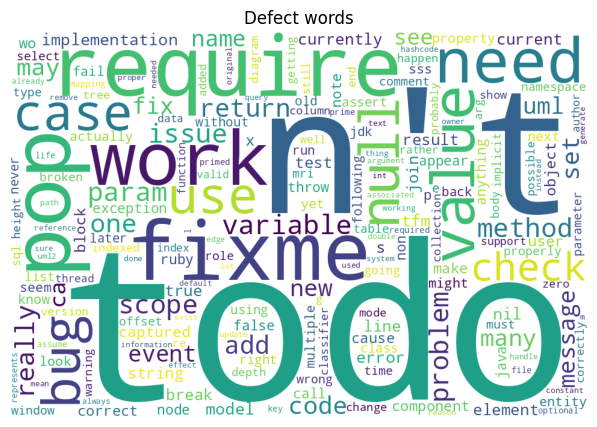

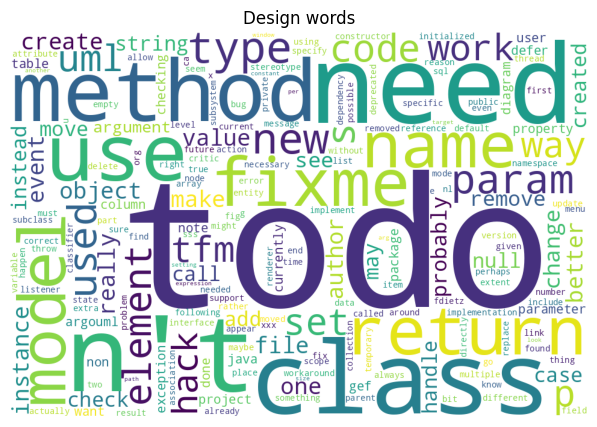

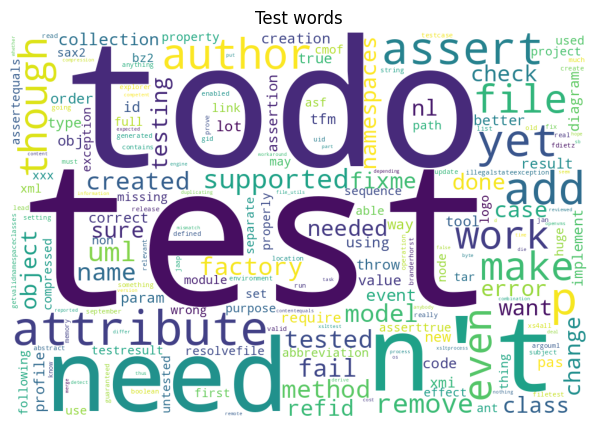

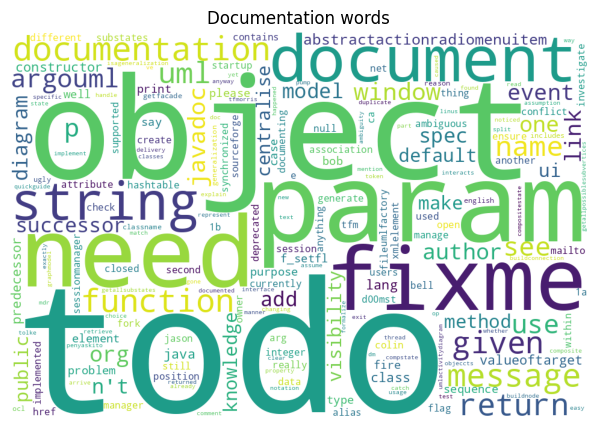

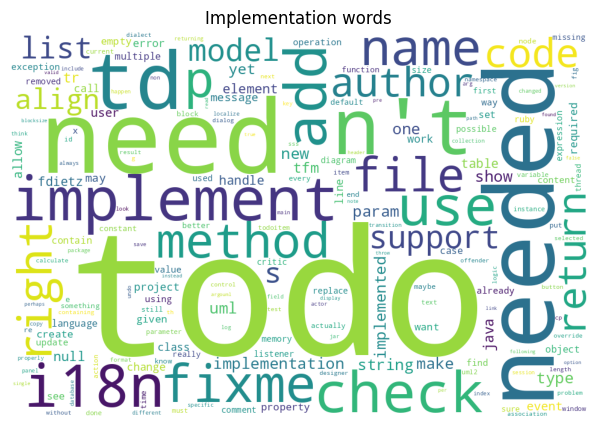

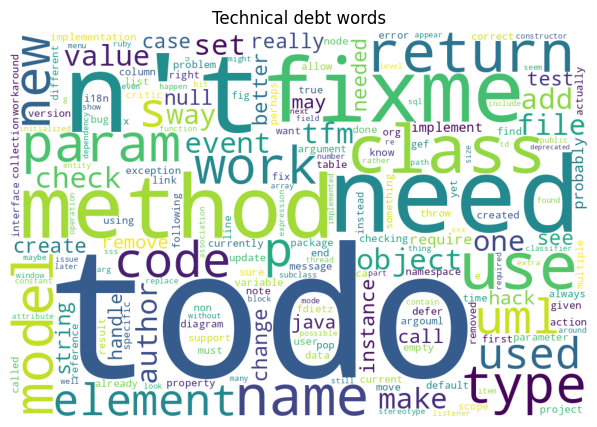

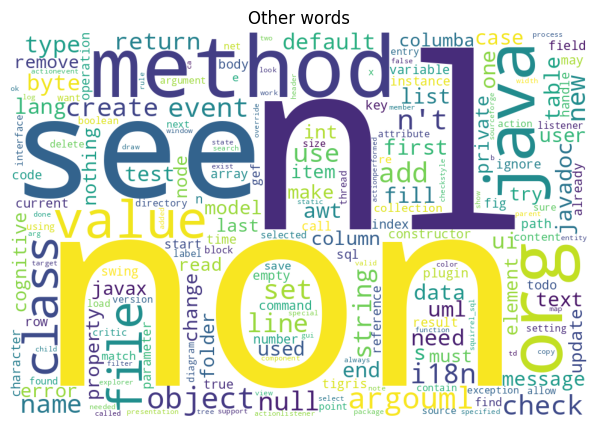

In [4]:
from wordcloud import WordCloud

def wordcloud(title, words):
    wordcloud = WordCloud(width=960, height=640, background_color="white",collocations=False, relative_scaling=0.5).generate(words)
    plt.title(title)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

wordcloud("Defect words", " ".join(defect_words))
wordcloud("Design words", " ".join(design_words))
wordcloud("Test words", " ".join(test_words))
wordcloud("Documentation words", " ".join(documentation_words))
wordcloud("Implementation words", " ".join(implementation_words))
wordcloud("Technical debt words", " ".join(technical_dept_words))
wordcloud("Other words", " ".join(other_words))

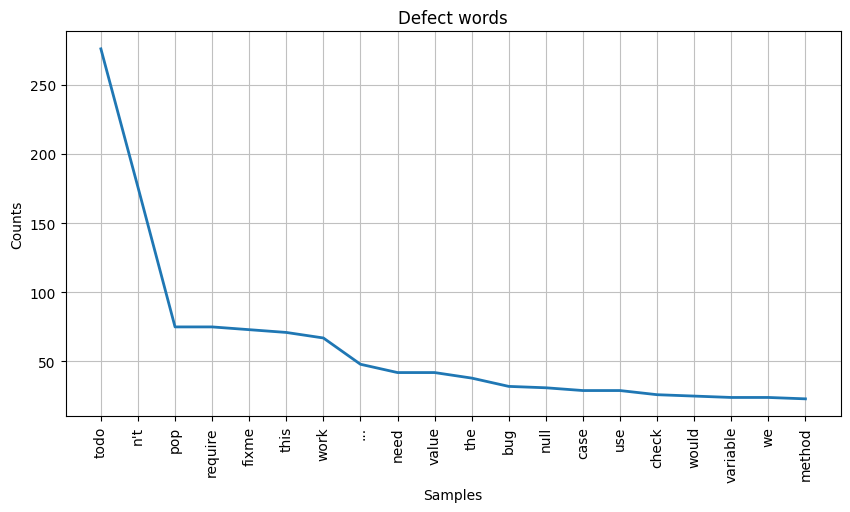

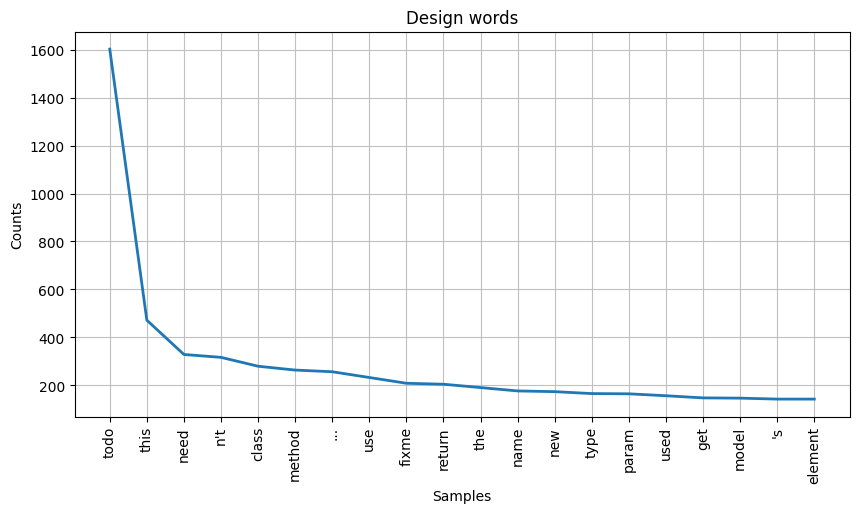

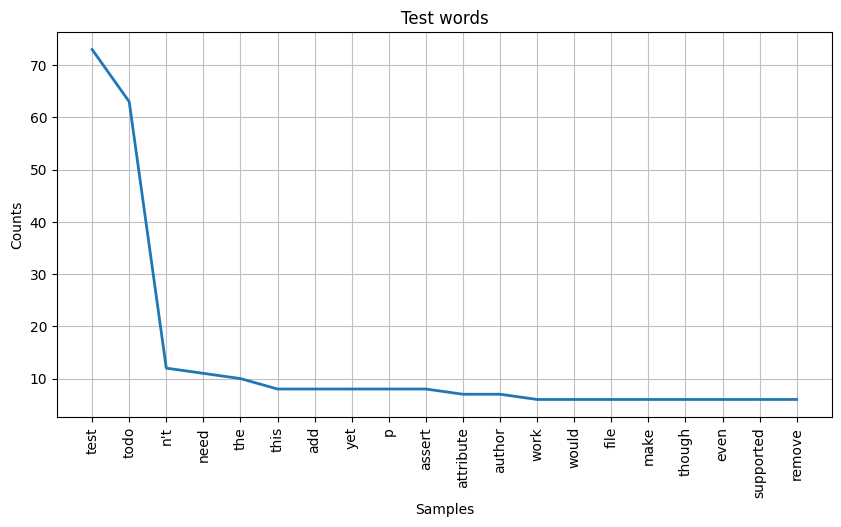

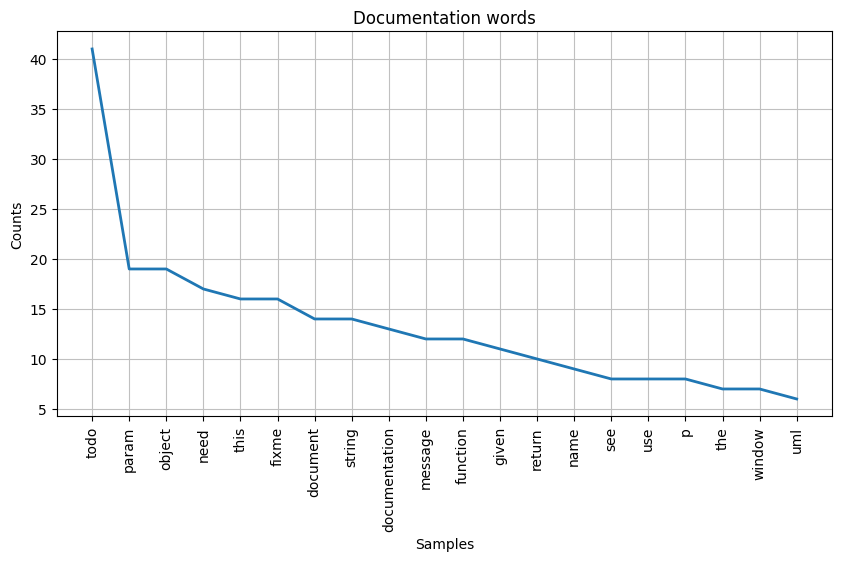

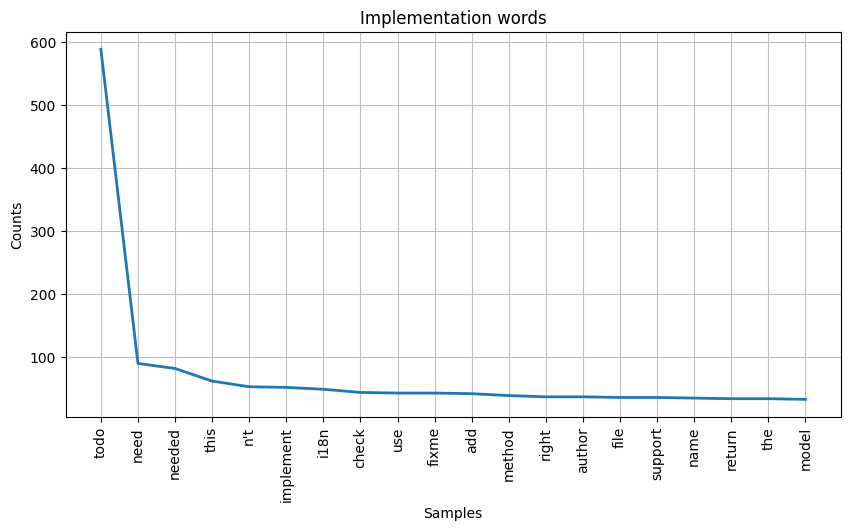

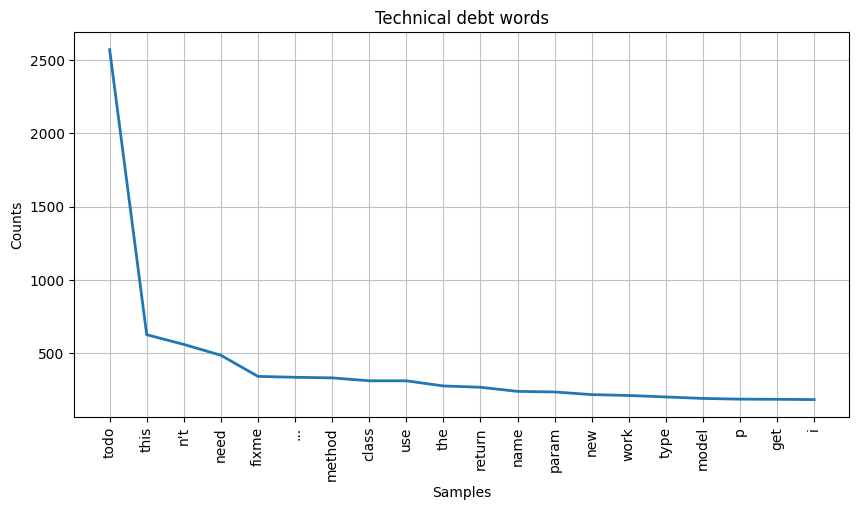

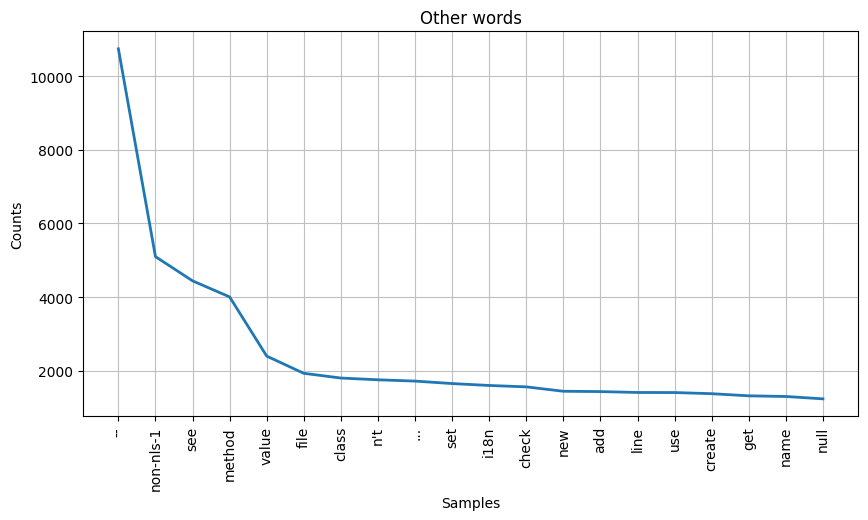

In [5]:
from nltk.probability import FreqDist

# Frequency distributions
plt.figure()
defect_fd = FreqDist(defect_words)
defect_fd.plot(20, title="Defect words", show=False)
plt.figure()
design_fd = FreqDist(design_words)
design_fd.plot(20, title="Design words", show=False)
plt.figure()
test_fd = FreqDist(test_words)
test_fd.plot(20, title="Test words", show=False)
plt.figure()
documentation_fd = FreqDist(documentation_words)
documentation_fd.plot(20, title="Documentation words", show=False)
plt.figure()
implementation_fd = FreqDist(implementation_words)
implementation_fd.plot(20, title="Implementation words", show=False)
plt.figure()
technical_dept_fd = FreqDist(technical_dept_words)
technical_dept_fd.plot(20, title="Technical debt words", show=False)
plt.figure()
other_fd = FreqDist(other_words)
other_fd.plot(20, title="Other words", show=False)
plt.show()

*2. We want to find out if one can characterize each category in terms of unique words it contain. For this
purpose, after appropriate preprocessing and lemmatization, construct a vocabulary S of the common
words that appear in all categories, and vocabulary S1, S2, S3, S4, S5, S6 of wording that were uniquely
present in a given category not in any other categories. Discuss the cardinality of S, S1, S2, S3, S4, S5
and S6. Draw histogram showing the frequency of the unique wording in each category. Store S, S1, S2,
S3, S4, S5 and S6 in a separate database, say D1.*

Common words across all categories:  105
Unique defect words:  328
Unique design words:  1773
Unique test words:  58
Unique documentation words:  36
Unique implementation words:  331
Unique technical debt words:  2635
Unique other words:  21702


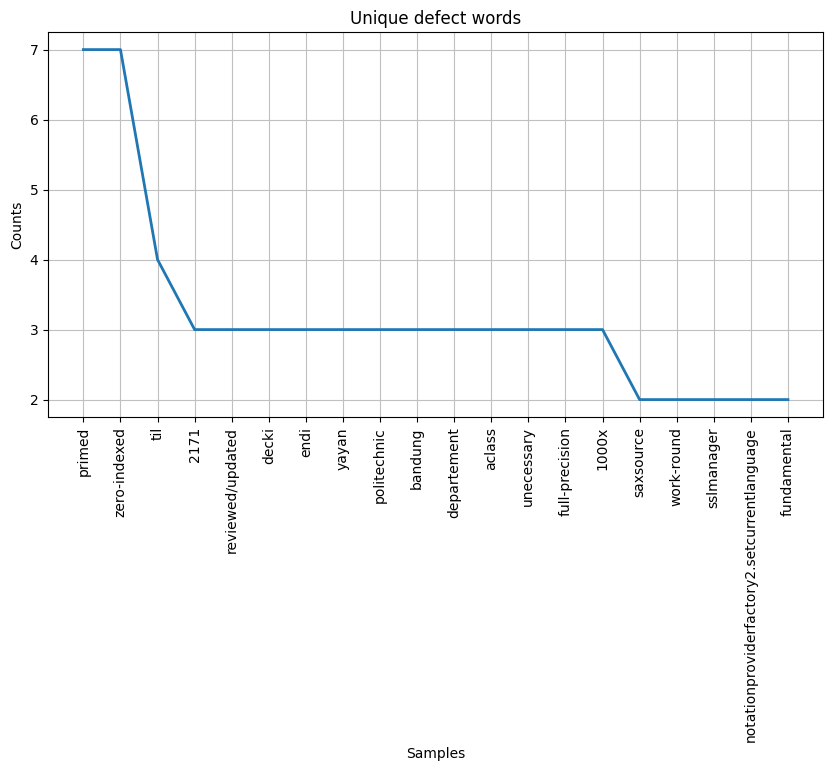

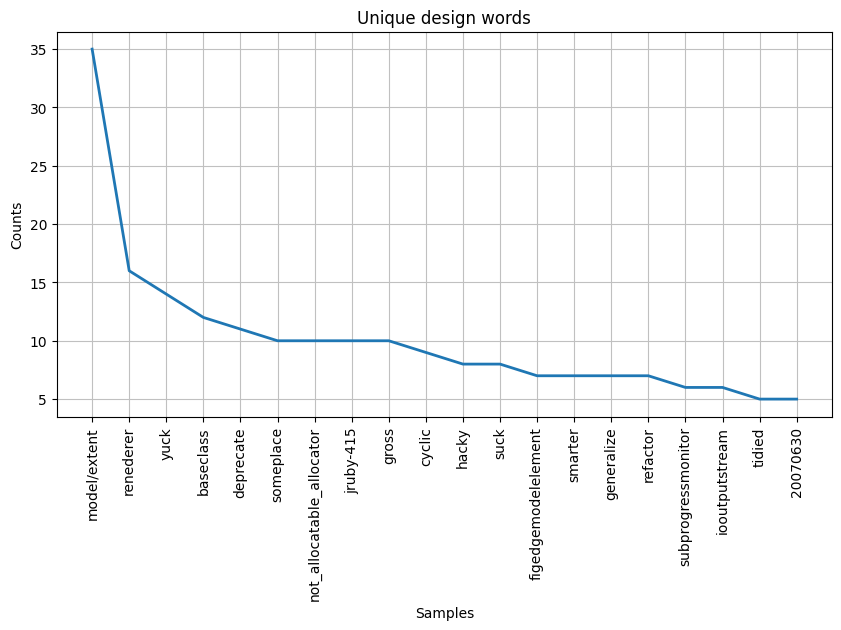

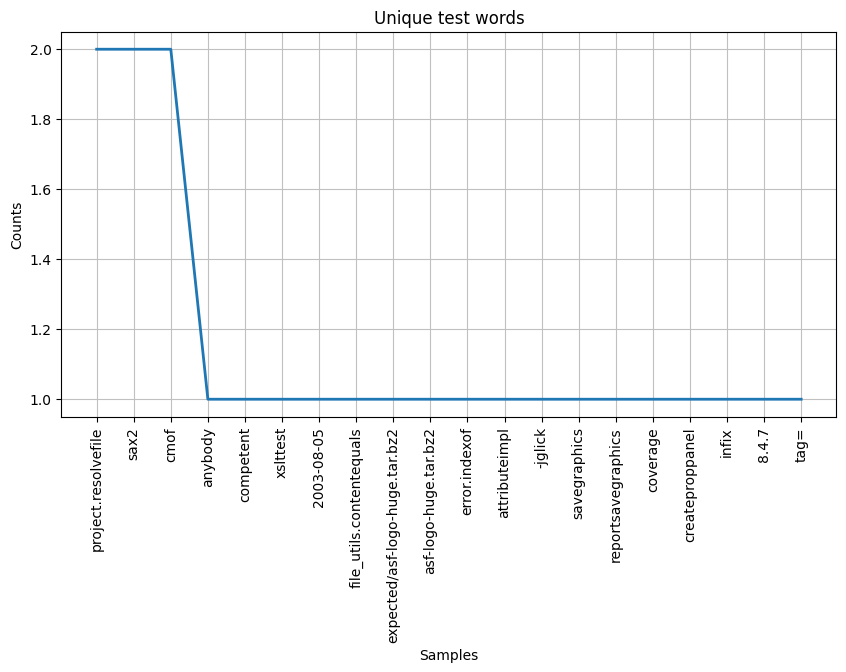

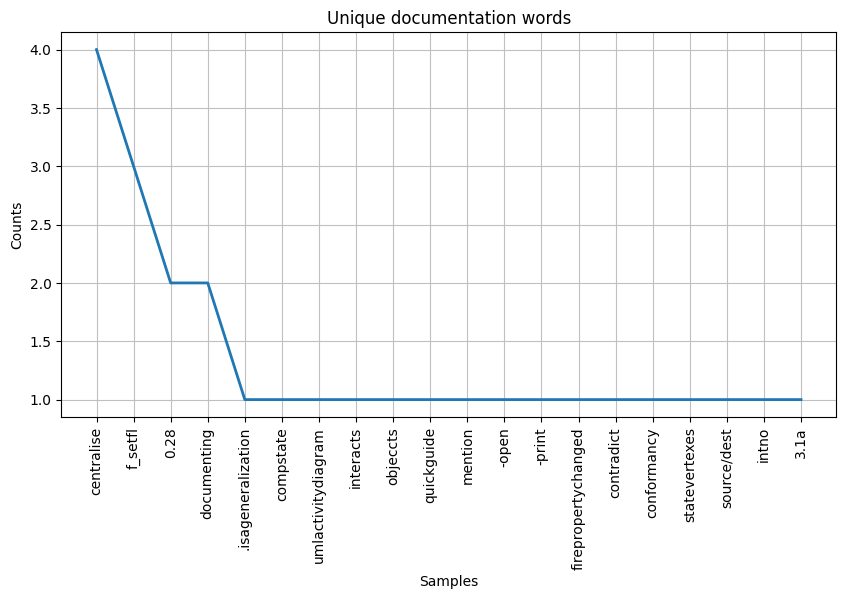

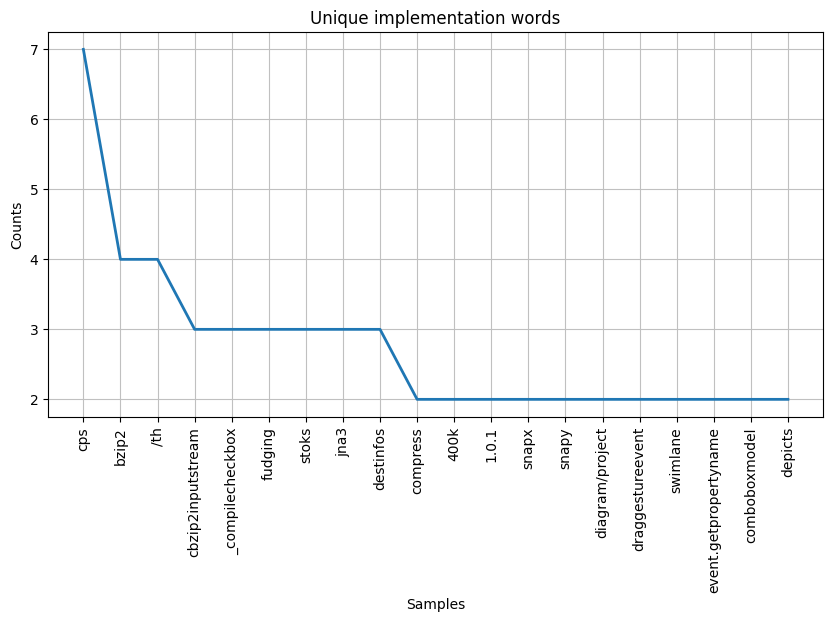

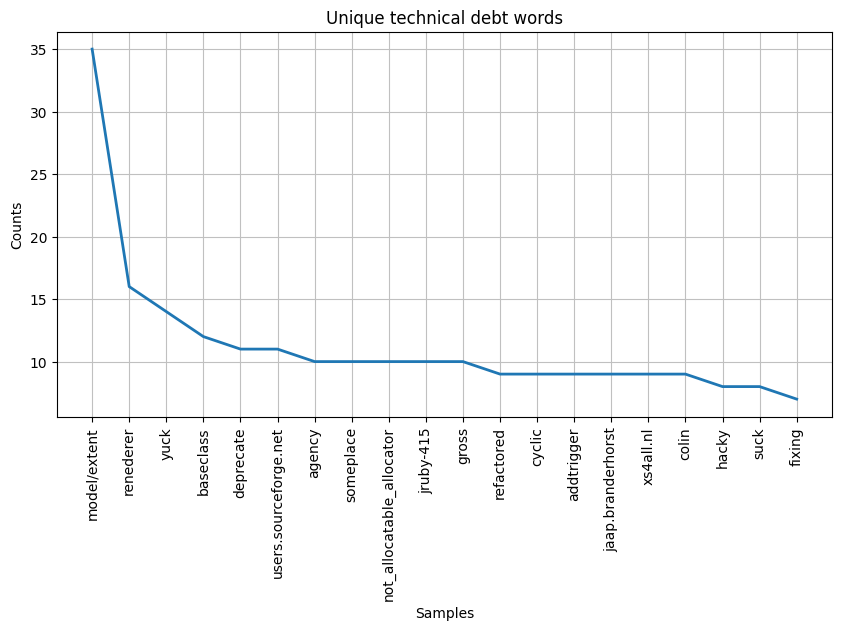

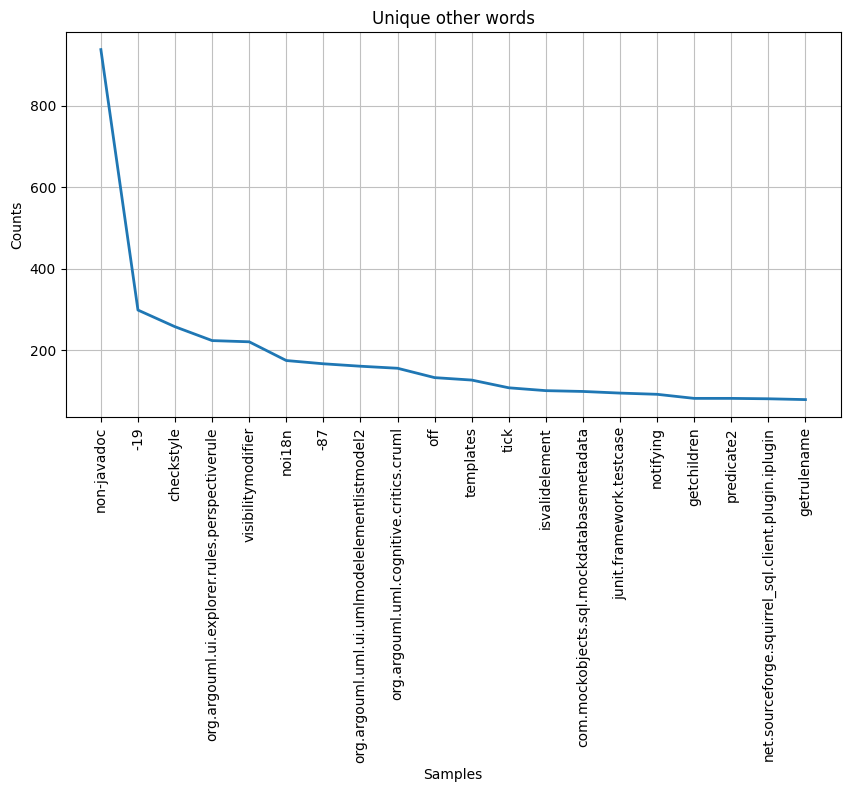

In [6]:
# Convert lists to sets to remove duplicate words
defect_words_set = set(defect_words)
design_words_set = set(design_words)
test_words_set = set(test_words)
documentation_words_set = set(documentation_words)
implementation_words_set = set(implementation_words)
technical_dept_words_set = set(technical_dept_words)
other_words_set = set(other_words)

# Find the words that are common to all categories
common_words = [word for word in defect_words_set if word in design_words_set and word in test_words_set and word in documentation_words_set and word in implementation_words_set and word in other_words_set]
print("Common words across all categories: ", len(common_words))

# Find the words that are unique to each category
defect_words_unique = [word for word in defect_words_set if word not in design_words_set and word not in test_words_set and word not in documentation_words_set and word not in implementation_words_set and word not in other_words_set]
print("Unique defect words: ", len(defect_words_unique))

design_words_unique = [word for word in design_words_set if word not in defect_words_set and word not in test_words_set and word not in documentation_words_set and word not in implementation_words_set and word not in other_words_set]
print("Unique design words: ", len(design_words_unique))

test_words_unique = [word for word in test_words_set if word not in defect_words_set and word not in design_words_set and word not in documentation_words_set and word not in implementation_words_set and word not in other_words_set]
print("Unique test words: ", len(test_words_unique))

documentation_words_unique = [word for word in documentation_words_set if word not in defect_words_set and word not in design_words_set and word not in test_words_set and word not in implementation_words_set and word not in other_words_set]
print("Unique documentation words: ", len(documentation_words_unique))

implementation_words_unique = [word for word in implementation_words_set if word not in defect_words_set and word not in design_words_set and word not in test_words_set and word not in documentation_words_set and word not in other_words_set]
print("Unique implementation words: ", len(implementation_words_unique))

technical_dept_words_unique = [word for word in technical_dept_words_set if word not in other_words_set]
print("Unique technical debt words: ", len(technical_dept_words_unique))

other_words_unique = [word for word in other_words_set if word not in defect_words_set and word not in design_words_set and word not in test_words_set and word not in documentation_words_set and word not in implementation_words_set]
print("Unique other words: ", len(other_words_unique))

# Frequency distributions of unique words
plt.figure()
defect_fd_unique = [pair for pair in defect_fd.items() if pair[0] in defect_words_unique]
defect_fd_unique = dict(defect_fd_unique)
defect_fd_unique = FreqDist(defect_fd_unique)
defect_fd_unique.plot(20, title="Unique defect words", show=False)
plt.figure()
design_fd_unique = [pair for pair in design_fd.items() if pair[0] in design_words_unique]
design_fd_unique = dict(design_fd_unique)
design_fd_unique = FreqDist(design_fd_unique)
design_fd_unique.plot(20, title="Unique design words", show=False)
plt.figure()
test_fd_unique = [pair for pair in test_fd.items() if pair[0] in test_words_unique]
test_fd_unique = dict(test_fd_unique)
test_fd_unique = FreqDist(test_fd_unique)
test_fd_unique.plot(20, title="Unique test words", show=False)
plt.figure()
documentation_fd_unique = [pair for pair in documentation_fd.items() if pair[0] in documentation_words_unique]
documentation_fd_unique = dict(documentation_fd_unique)
documentation_fd_unique = FreqDist(documentation_fd_unique)
documentation_fd_unique.plot(20, title="Unique documentation words", show=False)
plt.figure()
implementation_fd_unique = [pair for pair in implementation_fd.items() if pair[0] in implementation_words_unique]
implementation_fd_unique = dict(implementation_fd_unique)
implementation_fd_unique = FreqDist(implementation_fd_unique)
implementation_fd_unique.plot(20, title="Unique implementation words", show=False)
plt.figure()
technical_dept_fd_unique = [pair for pair in technical_dept_fd.items() if pair[0] in technical_dept_words_unique]
technical_dept_fd_unique = dict(technical_dept_fd_unique)
technical_dept_fd_unique = FreqDist(technical_dept_fd_unique)
technical_dept_fd_unique.plot(20, title="Unique technical debt words", show=False)
plt.figure()
other_fd_unique = [pair for pair in other_fd.items() if pair[0] in other_words_unique]
other_fd_unique = dict(other_fd_unique)
other_fd_unique = FreqDist(other_fd_unique)
other_fd_unique.plot(20, title="Unique other words", show=False)
plt.show()

*3. Use LDA with topics equal 6 and 20 words per topic. We would like to find out whether output of the
LDA matches the categorization provided by word frequency or unique wording. For this purpose, for
each topic, try to match the words of the topics to the twenty most frequent words and use a simple
string matching (i.e., Fuzzy-string matching) to report the percentage of string matching between two
sets. We shall proceed by elimination; namely, for each category characterized by its twenty most
frequent words, we compute the fuzzy-string matching with every topic and the assignment is made to
the topic that achieves the highest score. Discuss on the usefulness of this approach.*

In [24]:
# tän ajamisessa menee pari minuuttia

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a bag-of-words matrix as input to LDA and fit the model
vectorizer = CountVectorizer(max_df=0.10, max_features=5000, stop_words='english')
X = vectorizer.fit_transform(all_list)
lda_6 = LatentDirichletAllocation(n_components=6, learning_method='batch', random_state=0)
lda_2 = LatentDirichletAllocation(n_components=2, learning_method='batch', random_state=0)
X_topics_6 = lda_6.fit_transform(X)
X_topics_2 = lda_2.fit_transform(X)

In [26]:
# Display the topics
print("""
      ---------
      6 topics:
      ---------
      """)
n_top_words = 20
feature_names = np.array(vectorizer.get_feature_names_out())
for topic_idx, topic in enumerate(lda_6.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))

print("""
      ---------
      2 topics:
      ---------
      """)
n_top_words = 20
feature_names = np.array(vectorizer.get_feature_names_out())
for topic_idx, topic in enumerate(lda_2.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))


      ---------
      6 topics:
      ---------
      
Topic 1:
non nls class ignore return end null create args package classes false inner instance needed ignored array irubyobject resource double
Topic 2:
value todo byte used test code use make need constructor current set return type check data model sure null string
Topic 3:
add new file set create list string text need node message item don remove time property todo parent draw update
Topic 4:
default check null use try todo object don user column type just data td instance new width create case i18n
Topic 5:
method line i18n methods table folder file columba swing javax int error javadoc non org add body message gui boolean
Topic 6:
org java argouml object event ui uml lang awt cognitive gef private tigris fig i18n javadoc diagram model presentation critics

      ---------
      2 topics:
      ---------
      
Topic 1:
non nls org java argouml class object event uml ui javadoc lang awt new create int private cognitive string 